# Autonomous Vehicles: Digit Recognition from Street-Level Photographs

## Domain
**Autonomous Vehicles**

## Context
Recognizing multi-digit numbers from street-level photographs is crucial for modern map-making, such as in Google's Street View which consists of millions of geo-located 360-degree panoramic images. This ability not only aids in pinning precise locations but also serves the broader optical character recognition (OCR) community. Unlike OCR in controlled domains like document processing, recognizing text in natural scene images poses significant challenges due to the variability in text appearance and environmental conditions.

## Data Description
The dataset used is the **Street View House Numbers (SVHN)**, which is derived from Google Street View imagery. SVHN is a real-world image dataset designed for developing machine learning and object recognition algorithms. It focuses on a more complex task than the MNIST dataset as it involves recognizing digits and numbers in natural scene images with potential distractors. The images are provided in h5py file format, allowing for efficient handling and storage of large data. More about h5py can be found here: [H5py documentation](https://docs.h5py.org/en/stable/).

## Project Objective
The goal is to build a digit classifier using the SVHN dataset. This project will tackle the challenges of text variability, such as different fonts, colors, styles, orientations, and arrangements, along with environmental factors like lighting, shadows, and blurs due to motion or focus, which complicate the recognition process.

### Acknowledgements
- Yuval Netzer, Tao Wang, Adam Coates, Alessandro Bissacco, Bo Wu, Andrew Y. Ng
- "Reading Digits in Natural Images with Unsupervised Feature Learning", NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.
- [SVHN Dataset URL](http://ufldl.stanford.edu/housenumbers)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install h5py


#1. Data Import and Exploration [5 Marks]

##A. Read the .h5 file and assign to a variable. [2 Marks]

In [ ]:
import h5py

#Extracting file from the path
file_path = '/content/drive/MyDrive/aiml /NN Project/Data/Autonomous_Vehicles_SVHN_single_grey1.h5'

# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # List all groups
    print("Keys: %s" % file.keys())
    a_group_key = list(file.keys())[0]  # Take the first group

    # Get the data from the first group
    data = list(file[a_group_key])

    # If the data in the group is a dataset, you can convert it to a numpy array
    dataset = file[a_group_key][()]
    print(dataset)


Keys: <KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']>
[[[ 40.558   46.7917  48.9764 ... 112.1153 112.9904 112.1646]
  [ 39.4379  44.2911  47.1768 ... 111.0122 110.9475 109.9368]
  [ 38.4488  43.6394  48.7098 ... 109.8921 109.9414 109.1048]
  ...
  [ 34.9869  35.4707  39.6676 ... 109.211  109.9074 112.7346]
  [ 35.6602  35.5462  40.3193 ... 110.9998 112.049  114.3431]
  [ 36.1871  35.4214  40.6998 ... 110.0169 111.2017 114.1906]]

 [[115.1609 114.161  113.1611 ... 112.0302 112.6711 112.7851]
  [110.5743 110.2754 108.9766 ... 106.1448 106.7857 107.0137]
  [102.8031 102.5042 101.7924 ...  95.776   95.531   95.645 ]
  ...
  [169.8457 170.6176 167.8028 ...  45.1708  55.6967  62.81  ]
  [157.7329 157.6189 153.8042 ...  42.9538  50.1811  56.1805]
  [150.3207 149.2068 144.8051 ...  42.1388  48.2522  53.2517]]

 [[133.255  134.7279 136.3148 ... 103.7248 100.8391 100.6111]
  [134.2549 135.8418 138.3146 ... 117.1965 114.1968 114.0828]
  [136.2547 135.9558 137.4287 ... 

##B. Print all the keys from the .h5 file. [1 Marks]

In [ ]:
# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Print all keys in the file
    keys = list(file.keys())
    print("Keys in the .h5 file:", keys)

Keys in the .h5 file: ['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']


##C. Split the data into X_train, X_test, Y_train, Y_test [2 Marks]

In [ ]:
# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Load the datasets
    X_train = file['X_train'][:]
    X_test = file['X_test'][:]
    Y_train = file['y_train'][:]  # Note: Ensure the key matches what's in the file; it might be 'Y_train'
    Y_test = file['y_test'][:]    # Note: Ensure the key matches what's in the file; it might be 'Y_test'

# X_train, X_test, Y_train, Y_test are now numpy arrays containing the data from the .h5 file

#2. Data Visualisation and preprocessing [13 Marks]

##A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync. [1 Marks]

In [ ]:
# Print shapes of the datasets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of Y_train:", Y_train.shape)
print("Shape of Y_test:", Y_test.shape)
# This will show the number of examples and features/labels to ensure they are aligned.

Shape of X_train: (42000, 32, 32)
Shape of X_test: (18000, 32, 32)
Shape of Y_train: (42000,)
Shape of Y_test: (18000,)


##B. Visualise first 10 images in train data and print its corresponding labels. [4 Marks]

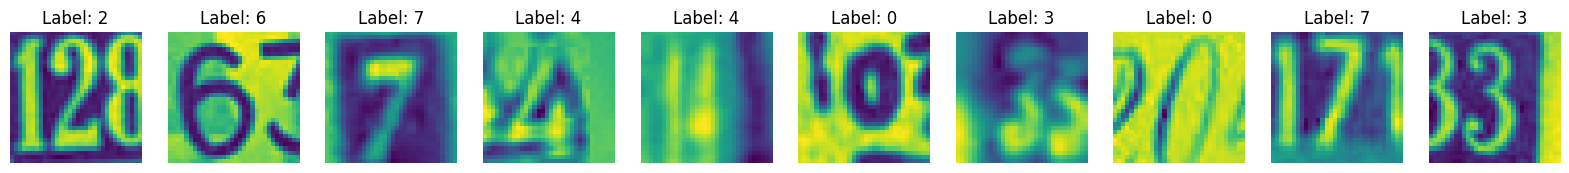

In [ ]:

import matplotlib.pyplot as plt

# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Load the datasets
    X_train = file['X_train'][:]
    Y_train = file['y_train'][:]

# Plotting the first 10 images and printing the corresponding labels
fig, axes = plt.subplots(1, 10, figsize=(20, 2))  # Setup a figure with 10 subplots (images)
for i, ax in enumerate(axes):
    ax.imshow(X_train[i])
    ax.set_title(f'Label: {Y_train[i]}')
    ax.axis('off')  # Hide axes for clarity

plt.show()  # Display the figure with the images and titles


##C. Reshape all the images with appropriate shape update the data in same variable. [3 Marks]

In [ ]:
# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Load the datasets
    X_train = file['X_train'][:]
    X_test = file['X_test'][:]

# Reshape the images
X_train = X_train.reshape(-1, 32, 32, 1)  # Reshape and add an extra dimension for the channel
X_test = X_test.reshape(-1, 32, 32, 1)

# The X_train and X_test variables are now updated with the reshaped image data

##D. Normalise the images i.e. Normalise the pixel values. [2 Marks]

In [ ]:
# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Load the datasets
    X_train = file['X_train'][:]
    X_test = file['X_test'][:]

# Normalizing the images to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# The X_train and X_test arrays are now normalized

##E. Transform Labels into format acceptable by Neural Network [2 Marks]

In [ ]:
pip install tensorflow


In [ ]:

import tensorflow as tf

# Open the .h5 file in read mode
with h5py.File(file_path, 'r') as file:
    # Load the label datasets
    Y_train = file['y_train'][:]
    Y_test = file['y_test'][:]

# Convert labels to one-hot encoded vectors
Y_train = tf.keras.utils.to_categorical(Y_train, num_classes=10)  # Adjust num_classes as needed
Y_test = tf.keras.utils.to_categorical(Y_test, num_classes=10)

# Y_train and Y_test are now arrays of one-hot encoded labels
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


Y_train shape: (42000, 10)
Y_test shape: (18000, 10)


##F. Print total Number of classes in the Dataset. [1 Marks]

In [ ]:

import numpy as np



# Find the unique classes and count them
unique_classes = np.unique(Y_train)
num_classes = len(unique_classes)

print("Total number of classes in the dataset:", num_classes)
print("They are:", unique_classes)

Total number of classes in the dataset: 2
They are: [0. 1.]


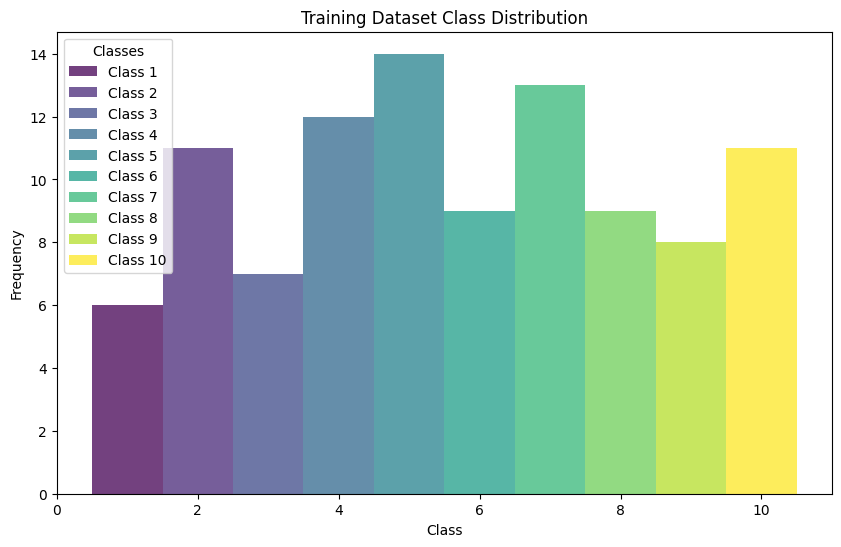

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


# Create a figure and axis object
fig, ax = plt.subplots(figsize=(10, 6))

# Define colors for each class
colors = plt.cm.viridis(np.linspace(0, 1, 10))  # Generating 10 colors from the 'viridis' colormap

# Define bin edges so each integer value falls squarely in a bin
bin_edges = np.arange(1, 12) - 0.5

# Plot histogram for each class with different colors
for i in range(1, 11):  # Classes from 1 to 10
    mask = Y_train == i
    ax.hist(Y_train[mask], bins=bin_edges, color=colors[i-1], label=f'Class {i}', alpha=0.75)

ax.set_title("Training Dataset Class Distribution")
ax.set_xlabel("Class")
ax.set_ylabel("Frequency")
ax.legend(title="Classes")

plt.show()


#3. Model Training & Evaluation using Neural Network [12 Marks]

##A. Design a Neural Network to train a classifier. [3 Marks]

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization,Activation
from tensorflow.keras.initializers import HeNormal, GlorotUniform

In [ ]:
# Define the Architecture model

model = Sequential([
    Conv2D(32, (3, 3), input_shape=(32, 32, 1), kernel_initializer=GlorotUniform(), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), kernel_initializer=GlorotUniform(), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.3),

    Conv2D(64, (3, 3), kernel_initializer=GlorotUniform(), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),
    Flatten(),
    Dropout(0.3),

    Dense(64, kernel_initializer=HeNormal(), kernel_regularizer=tf.keras.regularizers.l2(0.001)),
    BatchNormalization(),
    Activation('relu'),

    Dropout(0.5),
    Dense(10, activation='softmax')
])



# Print the model summary
model.summary()


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 30, 30, 32)        320       
                                                                 
 batch_normalization_16 (Ba  (None, 30, 30, 32)        128       
 tchNormalization)                                               
                                                                 
 activation_20 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 15, 15, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_5 (Dropout)         (None, 15, 15, 32)        0         
                                                                 
 conv2d_16 (Conv2D)          (None, 13, 13, 64)       

In [ ]:
for l in model.layers:
  print(l.name)

conv2d_15
batch_normalization_16
activation_20
max_pooling2d_10
dropout_5
conv2d_16
batch_normalization_17
activation_21
max_pooling2d_11
dropout_6
conv2d_17
batch_normalization_18
activation_22
flatten_5
dropout_7
dense_10
batch_normalization_19
activation_23
dropout_8
dense_11


##B. Train the classifier using previously designed Architecture (Use best suitable parameters). [3 Marks]

In [ ]:
#Compile the Model
from tensorflow.keras import optimizers

adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam, loss='categorical_crossentropy', metrics=['accuracy'])




In [ ]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau


In [ ]:
# Set up early stopping
# Set up early stopping and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min', restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-5, verbose=1)


In [ ]:
#Train the Model
history = model.fit(
    X_train, Y_train,
    epochs=50,
    batch_size=64,  # Batch size can be tuned for computational efficiency
    validation_data=(X_test, Y_test),
    callbacks=[early_stopping,reduce_lr]  # Added early stopping to stop at desire accuracy
)


Epoch 1/50
657/657 [==============================] - 10s 10ms/step - loss: 1.7823 - accuracy: 0.4795 - val_loss: 1.0260 - val_accuracy: 0.7424 - lr: 0.0010
Epoch 2/50
657/657 [==============================] - 6s 9ms/step - loss: 0.9564 - accuracy: 0.7622 - val_loss: 0.8122 - val_accuracy: 0.8021 - lr: 0.0010
Epoch 3/50
657/657 [==============================] - 5s 8ms/step - loss: 0.8114 - accuracy: 0.8020 - val_loss: 0.6347 - val_accuracy: 0.8554 - lr: 0.0010
Epoch 4/50
657/657 [==============================] - 7s 10ms/step - loss: 0.7507 - accuracy: 0.8192 - val_loss: 0.5999 - val_accuracy: 0.8670 - lr: 0.0010
Epoch 5/50
657/657 [==============================] - 6s 9ms/step - loss: 0.7175 - accuracy: 0.8297 - val_loss: 0.5682 - val_accuracy: 0.8774 - lr: 0.0010
Epoch 6/50
657/657 [==============================] - 6s 9ms/step - loss: 0.6857 - accuracy: 0.8402 - val_loss: 0.6135 - val_accuracy: 0.8654 - lr: 0.0010
Epoch 7/50
657/657 [==============================] - 6s 9ms/step -

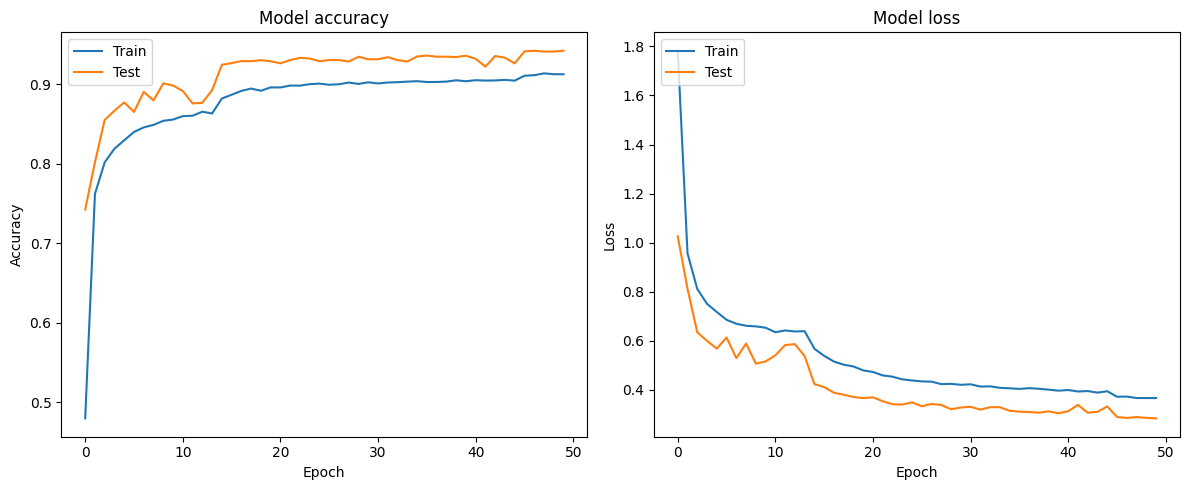

In [ ]:
#Monitoring Training Performance
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.subplot(1, 2, 2)
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')


plt.tight_layout()
plt.show()

563/563 [==============================] - 1s 2ms/step


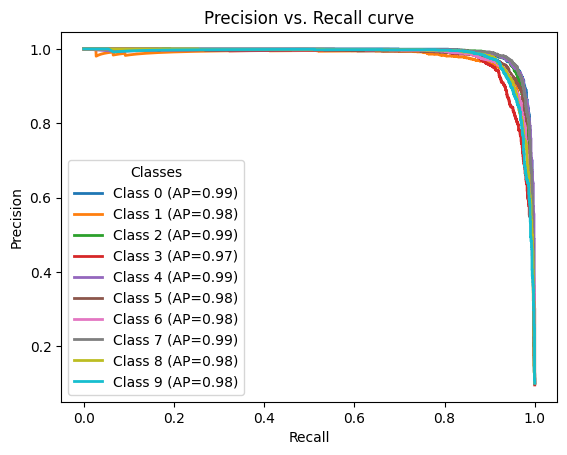

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.preprocessing import label_binarize
from tensorflow.keras.utils import to_categorical

# Assuming your model is a multi-class classification model and Y_test is not already binarized
# Binarize the output labels for multi-class classification
Y_test_binarized = label_binarize(Y_test, classes=np.arange(10))  # Assuming you have 10 classes

# Predict class probabilities on the test set
y_score = model.predict(X_test)

# Compute Precision-Recall and plot curve
precision = dict()
recall = dict()
average_precision = dict()

for i in range(10):  # Assuming you have 10 classes
    precision[i], recall[i], _ = precision_recall_curve(Y_test_binarized[:, i], y_score[:, i])
    average_precision[i] = average_precision_score(Y_test_binarized[:, i], y_score[:, i])
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i} (AP={average_precision[i]:0.2f})')

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="best", title="Classes")
plt.title("Precision vs. Recall curve")
plt.show()


##C. Evaluate performance of the model with appropriate metrics. [2 Marks]

In [ ]:
#Evaluate the Model
results = model.evaluate(X_test, Y_test) #generates touple of 2 values loss and Accuracy stored in Results
print(" Test Loss:", results[0]) #holds the value of Loss
print("Test Accuracy:", results[1]) #holds the value of accuracy

563/563 [==============================] - 2s 4ms/step - loss: 0.2841 - accuracy: 0.9425
 Test Loss: 0.2840858995914459
Test Accuracy: 0.9424999952316284


In [ ]:
# Predictions for Detailed Metrics
from sklearn.metrics import classification_report
import numpy as np

# Predict classes with the model
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(Y_test, axis=1)

# Print classification report
print(classification_report(true_classes, predicted_classes))


563/563 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      1814
           1       0.92      0.94      0.93      1828
           2       0.95      0.95      0.95      1803
           3       0.94      0.91      0.92      1719
           4       0.95      0.96      0.95      1812
           5       0.94      0.95      0.94      1768
           6       0.94      0.94      0.94      1832
           7       0.96      0.96      0.96      1808
           8       0.95      0.93      0.94      1812
           9       0.95      0.93      0.94      1804

    accuracy                           0.94     18000
   macro avg       0.94      0.94      0.94     18000
weighted avg       0.94      0.94      0.94     18000



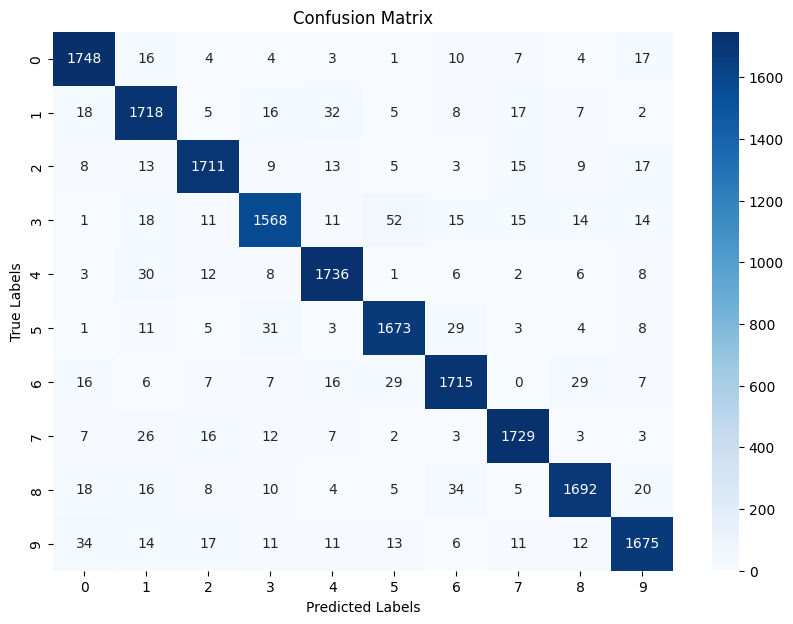

In [ ]:
#Plot Confusion Matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


##D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your
observations on the same. [4 Marks]

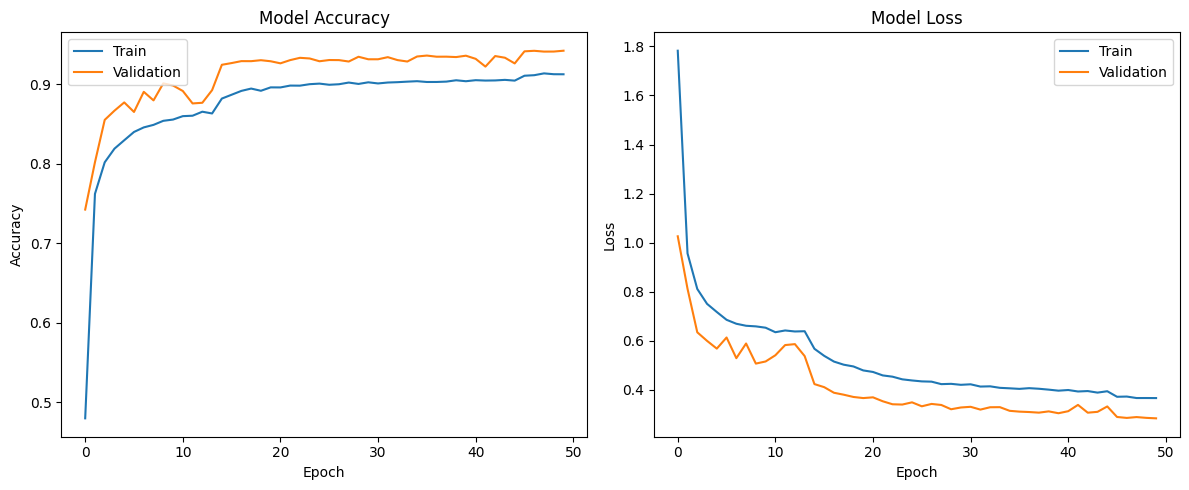

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


###Insights

## Model Performance Analysis

Here is a concise six-point analysis of the model's performance:

### 1. High Accuracy
- The model achieves an accuracy level **above 94%**, indicating it has a strong capability of generalizing from the training data to unseen test data.

### 2. Precision and Recall
- The precision-recall curve demonstrates that the model maintains **high precision and recall** across almost all thresholds, suggesting a balanced capability in identifying positive instances with a low false-positive rate.

### 3. Learning Rate Adjustments
- The **learning rate schedule** effectively impacts the model by improving performance after reducing the learning rate when the validation performance plateaus.

### 4. Loss Behavior
- Both training and validation loss decrease over time, with training loss consistently lower than validation loss, indicating a good fit. However, a small gap does suggest a slight overfitting, which the model recovers from as training progresses.

### 5. Confusion Matrix Insights
- The confusion matrix indicates relatively low error rates. However, certain classes are more frequently confused with each other, warranting a closer examination of these classes' features or consideration of different data augmentation strategies.

### 6. Early Stopping and Plateaus
- The use of **EarlyStopping** and **ReduceLROnPlateau** callbacks effectively prevent overtraining. These mechanisms allow the model to converge to a more optimal solution by recovering performance after learning rate reductions.

Overall, the model is finely tuned for the current dataset, exhibiting robust and consistent performance across classes. To achieve further improvement, focusing on the specific classes with higher misclassifications may provide insight, possibly necessitating more complex models, additional data, or feature engineering.
